# <span style="color:blue"> <center>Student / TD3 : 4TPU279U $-$ Bachelor 1st year $-$ spring 2023</center></span>
# <center>Introduction to python programming</center>
# <hr style="border:1px solid black"><center>  Data Processing and Plot </center><hr style="border:1px solid black">
</br>

<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot </div>

<hr style="border:1px solid grey">

The following topics will be cover in this notebook:
- Process data files
- Basics in plotting
- Example of linear fit

## <hr style="border:1px solid black">  Process data files  <hr style="border:1px solid black">

### Using python intrinsic functions
> Having a data file **located in the directory** `data_examples` located at the same place than the jupypter-notebook file the later can be *opened* using the built-in function [`open()`](https://docs.python.org/3/library/functions.html#open).
> An example is given below with the data file `data_sin.csv` where the second argument in `open()` -namely `'r'`- stands for *reading* processing

In [ ]:
file = open('data_examples/data_sin.txt','r')
print(type(file))

*Remark: to visualize the content of `data_sin.txt` in a jupyter-notebook you can clic on `File/Open` and choose the file from the current directory*

> the content of the `data_sin.txt` can be imported using the `_io.TextIOWrapper`
function `readlines()`. In that case data  is stored in `data` as a list of strings.

In [ ]:
data = file.readlines()
print(data)

> To get ride of the first line we can use `readline()` (without s!) first. This will extract the first line of the file. Then `readlines()` can be safely used.

In [ ]:
file = open('data_examples/data_sin.txt','r')
data = file.readline()
data = file.readlines()
print(data)

> The character string `\n` indicates that the current line ends at that point and a new line starts right after it. This can be examplified by using `print()`. For instance:

In [ ]:
print('Hello\nworld!')

> Having inspected `data_sin.txt` we know that we have 2 columns of data and that the first line refer to the type of data. Unfortunatly, `data` is a single list containing concatenated column elements.

> In order to separate column elements, we may recognize the space `' '` as separator. Note that `'.'` is also a seprator for identifying decimal numbers. To separate the columns we can re-process and operate *line by line* by looping over the rows of data and use the function `split`:

In [ ]:
x = [ ] ; y = [ ]
for line in data:
    words = line.split(' ')
    #print(words)

> Since `words` is a list of 2 elements it becomes easy to store data into two **lists** $x$ and $y$ and convert strings to floats.

In [ ]:
x = [ ] ; y = [ ]
for line in data:
    words = line.split(' ')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
print(x)
print()
print(y)

> To summarize how to process a data file containing a header and two columns of data
separated by a space, we have:

In [ ]:
file = open('data_examples/data_sin.txt','r')
file.readline()

x = [ ] ; y = [ ]
for line in file:
    words = line.split(' ')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
#print(x)
#print()
#print(y)

> For later use, note that if we want to operate on $x$ and $y$ using mathematical operators we will need to convert them into `numpy array`.

In [ ]:
from numpy import array
x = array(x)
y = array(y)

*Note that even the command `open` can also be used for writing data but is not well adapted to handle list and arrays. We should prefer to use the function `savetxt` of the numpy libray. An example is given below*

For instance if you want to create a file containing 2 columns $(\theta,f)$ with $f(\theta)=\cos(x)$ with $\theta\in[0,\pi]$ for 32 data points, you can use:

In [ ]:
from numpy import pi, cos, linspace, savetxt, column_stack, sin

theta = linspace(0.0,2*pi,64)
f     = cos(theta)

savetxt('data_examples/data_cos.txt', column_stack([theta,f]), fmt='%1.4f')

#### Note on CSV file
A comma-separated values ([CSV](https://en.wikipedia.org/wiki/Comma-separated_valuesCSV)) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. Alternative delimiter-separated files are often given a ".csv" extension despite the use of a non-comma field separation.

##### Exercice 5.0 :  English CSV format  <hr style="border:1px solid grey">
1. Open the data file `data_sin_en.csv` located in `data_examples` directory.
2. Extract the 2 columns and store the results into 2 arrays. Note that the separator is a coma `','`.
3. Print the results.

<hr style="border:1px solid grey">

##### Exercice 5.1 : French CSV format  <hr style="border:1px solid grey">
1. Open the data file `data_sin_fr.csv` located in `data_examples` directory.
2. Extract the 2 columns and store the results into 2 arrays. 
3. Print the results.
*Note that this is a French CSV data file. In this case the separator is the semi-column character ";". The decimal separator is the coma ",". To store the data into array you will need to replace the
coma by a dot. This can be done with the function `replace()`.* An example is given below:

In [ ]:
test = '3,14116'
test.replace(',','.')

<hr style="border:1px solid grey">

### Using Pandas

[Pandas](https://en.wikipedia.org/wiki/Pandas_(software)) is a library written for Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series which are refered as to *DataFrames*.

[Pandas](https://pandas.pydata.org) is mainly used for data analysis and associated manipulation of tabular data in DataFrames. Pandas allows importing data from various file formats such as CSV, JSON, Parquet, SQL database tables or queries, and Microsoft Excel. The pandas library is built upon another library NumPy, which is oriented to efficiently working with arrays.

> Read and process `CSV` file

In [2]:
from pandas import read_csv

data = read_csv('data_examples/harelynx.csv')
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
       t   Hare   Lynx
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


> Read and process `EXCEL` file

In [3]:
from pandas import read_excel

data = read_excel('data_examples/harelynx.xls')
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
       t   Hare   Lynx
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


> From `panda DataFrame` to `numpy array`

In [4]:
data_numpy_array = data.to_numpy()
print(type(data_numpy_array))
print(data_numpy_array)

<class 'numpy.ndarray'>
[[1.8450e+03 1.9580e+01 3.0090e+01]
 [1.8460e+03 1.9600e+01 4.5150e+01]
 [1.8470e+03 1.9610e+01 4.9150e+01]
 [1.8480e+03 1.1990e+01 3.9520e+01]
 [1.8490e+03 2.8040e+01 2.1230e+01]
 [1.8500e+03 5.8000e+01 8.4200e+00]
 [1.8510e+03 7.4600e+01 5.5600e+00]
 [1.8520e+03 7.5090e+01 5.0800e+00]
 [1.8530e+03 8.8480e+01 1.0170e+01]
 [1.8540e+03 6.1280e+01 1.9600e+01]
 [1.8550e+03 7.4670e+01 3.2910e+01]
 [1.8560e+03 8.8060e+01 3.4380e+01]
 [1.8570e+03 6.8510e+01 2.9590e+01]
 [1.8580e+03 3.2190e+01 2.1300e+01]
 [1.8590e+03 1.2640e+01 1.3690e+01]
 [1.8600e+03 2.1490e+01 7.6500e+00]
 [1.8610e+03 3.0350e+01 4.0800e+00]
 [1.8620e+03 2.1800e+00 4.0900e+00]
 [1.8630e+03 1.5265e+02 1.4330e+01]
 [1.8640e+03 1.4836e+02 3.8220e+01]
 [1.8650e+03 8.5810e+01 6.0780e+01]
 [1.8660e+03 4.1410e+01 7.0770e+01]
 [1.8670e+03 1.4750e+01 7.2770e+01]
 [1.8680e+03 2.2800e+00 4.2680e+01]
 [1.8690e+03 5.9100e+00 1.6390e+01]
 [1.8700e+03 9.9500e+00 9.8300e+00]
 [1.8710e+03 1.0440e+01 5.8000e+00]
 [1.

> From `numpy array` to `pandas DataFrame`

In [5]:
from pandas import DataFrame

data_pandas = DataFrame(data_numpy_array,columns=['t', 'lievre', 'lynx'])
print(data_pandas)

         t  lievre   lynx
0   1845.0   19.58  30.09
1   1846.0   19.60  45.15
2   1847.0   19.61  49.15
3   1848.0   11.99  39.52
4   1849.0   28.04  21.23
..     ...     ...    ...
86  1931.0   19.52   8.31
87  1932.0   82.11  16.01
88  1933.0   89.76  24.82
89  1934.0   81.66  29.70
90  1935.0   15.76  35.40

[91 rows x 3 columns]


> Print `pandas DataFrame` to `CSV` file

In [6]:
# with the index and the header (default)
data_pandas.to_csv('data_examples/lievrelynx_hi.csv') 

# without the index and the header
data_pandas.to_csv('data_examples/lievrelynx.csv', header=False, index=False)

> Basic statistics with `pandas`

In [7]:
print(data_pandas['lievre'].describe())
print()
print(data_pandas['lynx'].describe())

count     91.000000
mean      45.406484
std       36.375402
min        1.800000
25%       12.730000
50%       40.970000
75%       71.405000
max      152.650000
Name: lievre, dtype: float64

count    91.000000
mean     28.336593
std      18.864463
min       3.190000
25%      11.840000
50%      29.590000
75%      42.520000
max      79.350000
Name: lynx, dtype: float64


##### Exercice 5.2 :   <hr style="border:1px solid grey">
Given a set of data $\{x\}_{i=1}^{N}$, the mean ($\mu$) and the standard deviation ($\sigma$) are given by:
$\mu = \frac{1}{N}\sum_{i=1}^N x_i$ and $ \sigma=\sqrt{\frac{1}{N-1}\sum_{i=1}^N(x_i-\mu)^2}$
> Load the data file `lynxhare.csv` using `pandas` and convert to a numpy array.

> Generate two 1D numpy arrays called `hare` and `lynx`.

> Using the python built-in function (`min`, `max`, `sum`, `len`) compute the min/max, $\mu$ and $\sigma$ for the hare and lynx population. 

> Print the results with an appropriate format and compare to `pandas` values.

In [30]:
from numpy  import sqrt
import numpy as np
from pandas import read_csv
import pandas


def mean(arr):
    sum = 0
    for e in arr:
        sum += e
    return sum/len(arr)

def std_dev(arr):
    m = mean(arr)
    N = len(arr)
    
    sum = 0
    for x in arr:
        sum += (x - m)**2
    
    sum /= N-1
    
    return np.sqrt(sum)

def analyse(arr):
    print(f"count: {len(arr):5}")
    print(f"mean: {mean(arr):5}")
    print(f"std: {std_dev(arr):5}")
    print(f"min: {min(arr):5}")
    print(f"max {max(arr):5}")
    

#file = open("data_examples/harelynx.csv", "r")

data = pandas.read_csv("data_examples/harelynx.csv")
data_np = data.to_numpy()

hare = [ e[1] for e in data_np ]
lynx = [ e[2] for e in data_np ]
    
#print(hare)
print("Hare data", end="")
analyse(hare)

print()

print("Lynx data", end="")
analyse(lynx)

print()

print(data['Hare'].describe())
print()
print(data['Lynx'].describe())



Hare datacount:    91
mean: 45.406483516483526
std: 36.37540241468512
min:   1.8
max 152.65

Lynx datacount:    91
mean: 28.33659340659341
std: 18.86446313514618
min:  3.19
max 79.35

count     91.000000
mean      45.406484
std       36.375402
min        1.800000
25%       12.730000
50%       40.970000
75%       71.405000
max      152.650000
Name: Hare, dtype: float64

count    91.000000
mean     28.336593
std      18.864463
min       3.190000
25%      11.840000
50%      29.590000
75%      42.520000
max      79.350000
Name: Lynx, dtype: float64


<hr style="border:1px solid grey">

## <hr style="border:1px solid black">  Basic in plotting  <hr style="border:1px solid black">
Below some examples how to do plots with python with an increasing complexity. A huge gallery of examples can be found here [https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html). 1D plots can be drawn using the (sub)-library 
[`pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) from [`matplotlib`](https://matplotlib.org)

> Note that the alias `plt` shall be used througout this notebook for the `pyplot`.
respectively.

In [ ]:
import matplotlib.pyplot as plt

#### Simple 1D graphics

> Let's plot $y=\sin(2\pi t)\exp(-t)$ for $t\in[0,5]$ with $n=40$ grid points

<class 'numpy.ndarray'>


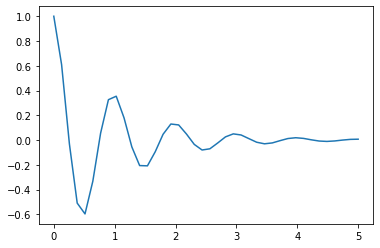

In [32]:
import numpy as np
from numpy import pi, exp, cos, linspace
import matplotlib.pyplot as plt

n    =  40
tmin =   0
tmax =   5

t = linspace(tmin,tmax,n)
y = cos(2*pi*t)*exp(-t)

print(type(y))

plt.plot(t,y)

> By default, the function [`plot()`](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html) interpolate (straight segments) between data point and the data are not represented by markers.

> In the examples below you can choose: [`linestyle`](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), [`markers`](https://matplotlib.org/stable/api/markers_api.html), [`color`](https://matplotlib.org/stable/tutorials/colors/colors.html) and add a `label` for each plot. The [`legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) function should be called for the label to be added on the plot.

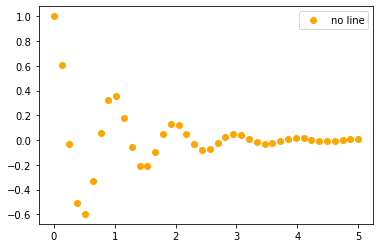

In [42]:
plt.plot(t, y, marker='o', linestyle='', color='orange', label='no line')
plt.legend()

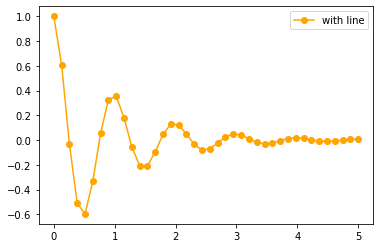

In [38]:
plt.plot(t, y, marker='o', linestyle='solid', color='orange', label='with line')
plt.legend()

> Let's play with line and marker options 

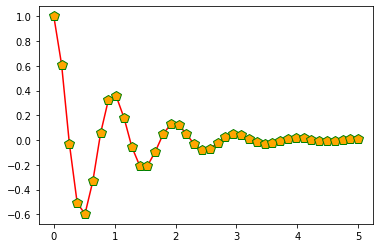

In [58]:
plt.plot(t, y, marker='p', linestyle='solid', color='red', \
         linewidth=1.5, ms=10.0, mew=1.0, mec='green', mfc='orange')

##### Exercice 5.3 :  <hr style="border:1px solid grey">
Found the purpose of `linewidth`, `ms`, `mew`, `mec`and `mfc` in the example above 

linewidth: controls the width of the line

ms: controls the size of the marker filling

mew: controls the size of the marker border lines

mec: controls the colour of the marker border lines

mfc: controls the colour of the marker filling


<hr style="border:1px solid grey">

##### Exercice 5.4 :  <hr style="border:1px solid grey">
Using the functions of **Exercice 2.1** in **TD2** plot:
$$f(x)=4x^2\exp(-2x)$$ 

$$g(x)=\frac{x^2}{2}\left(1-\frac{x}{2}\right)^2\exp(-x)$$

$$h(x)= \frac{4x^2}{243}\left(3 - 2x + \frac{2}{9}x^2\right)^2 \exp\left(-\frac{2x}{3}\right)$$
for $x\in[0,20]$ with $n=100$ grid points, following the rules:
1. For both curves, there is no markers
2. The curves must be solid-orange, -red and -purple for $f(x)$, $g(x)$ and $h(x)$, respectively.
3. The legend must be printed.

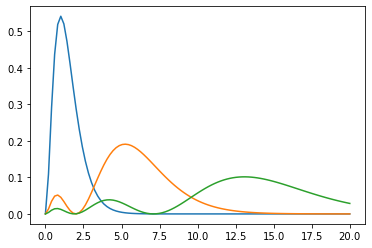

In [64]:
import numpy as np
from numpy import exp, linspace
import matplotlib.pyplot as plt

x = linspace(0, 20, 100)
f = 4*x**2 * exp(-2*x)

g = (x**2)/2 * (1 - x/2)**2 * exp(-x)

h = (4*x**2)/243 * (3 - 2*x + 2/9*x**2)**2 * exp(-2*x/3)

plt.plot(x, f)
plt.plot(x, g)
plt.plot(x, h)

<hr style="border:1px solid grey">

> Below an example to set ranges to $x\in[0,12]$ and $y\in[0,0.3]$.

(0.0, 0.3)

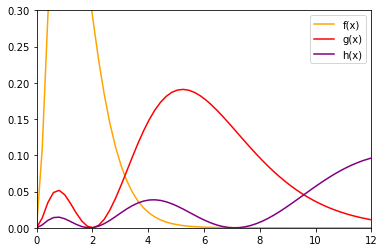

In [66]:
import matplotlib.pylab as plt

plt.plot(x,f,marker='',linestyle='solid', color='orange', linewidth=1.5, label='f(x)')
plt.plot(x,g,marker='',linestyle='solid', color='red',    linewidth=1.5, label='g(x)')
plt.plot(x,h,marker='',linestyle='solid', color='purple', linewidth=1.5, label='h(x)')

plt.legend()

plt.xlim(0,12)
plt.ylim(0,0.3)

> $x$- and $y$-axis labels are added using `xlabel()` and `ylabel()`. 

> The dollar symbols in the label stand for [$\LaTeX$](https://en.wikibooks.org/wiki/LaTeX/Mathematics) formatting of equations.

> $x$- and $y$-axis ticks can be set explicitely using `xticks()` and `yticks()` along with `arange()`

> > The figure can be printed in save using the [`savefig()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) function.

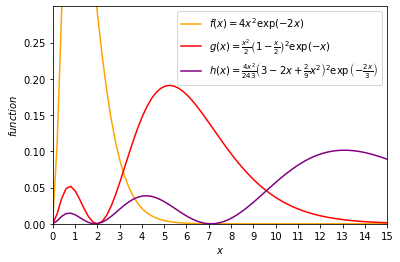

In [71]:
import matplotlib.pylab as plt
from numpy import arange

plt.plot(x,f,marker='',linestyle='solid', color='orange', linewidth=1.5, 
         label='$f(x)=4x^2\exp(-2x)$')
plt.plot(x,g,marker='',linestyle='solid', color='red',    linewidth=1.5,
         label='$g(x)=\\frac{x^2}{2}\\left(1-\\frac{x}{2}\\right)^2\\exp(-x)$')
plt.plot(x,h,marker='',linestyle='solid', color='purple', linewidth=1.5,
         label='$h(x)=\\frac{4x^2}{243}\\left(3 - 2x + \\frac{2}{9}x^2\\right)^2 \\exp\\left(-\\frac{2x}{3}\\right)$')
plt.legend()

plt.xlabel('$x$')
plt.ylabel('$function$')

# x-ticks for x in [0,20] with step 1
plt.xticks(arange(0.0, 20, 1 ))

# y-ticks for y in [0,0.3] with step 0.02
plt.yticks(arange(0.0, 0.3, 0.05))

plt.xlim(0,15)
plt.ylim(0,0.3)

plt.savefig('figure_examples/figure_test.png', dpi=300, format='png', transparent=True)

##### Exercice 5.5 :   <hr style="border:1px solid grey">

We provide a data file `comete_C2022E3ZTF.txt` which gather observations of the C/2022 E3 (ZTF) comet from the 22th of March 2022 to the 25th of February 2023. These data are available from the [LESIA website](https://lesia.obspm.fr/comets/lib/all-obs-table.php?Code=CK22E030&y1=1908&m1=01). We want to plot the distance with respect to the sun ($r$) and to the earth ($d$) as a function of the [Julian day](https://fr.wikipedia.org/wiki/Jour_julien) ($j$). A visualisation of the trajectory is available [here](https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=C%2F2022%20E3&view=VOP).

1. Go online and check which where are located $j$, $r$ and $d$ in the table.
2. Check the data file located in the directory `data_examples`and identify the corresponding rows. 
3. Load the data and extract the 3 columns.
4. On the same graph plot $r$ and $d$ as a function of $j$.
5. Add axis labels and a legend.

***Warning:*** *you may have trouble with some data which can't be converted to float. Find a way to circumvent
the problem by using, for instance, the function `replace()` to replace the character by a float, say 0.0.*

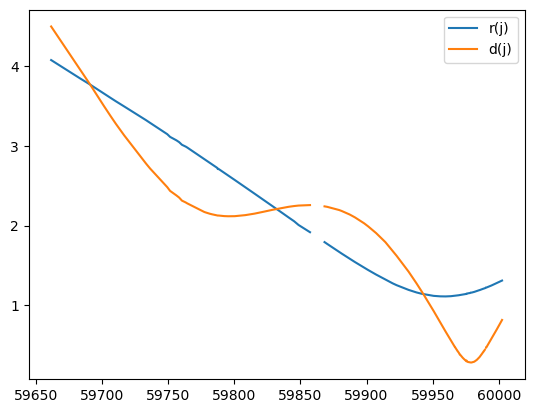

In [3]:
import matplotlib.pylab as plt
import numpy as np
import pandas

data_pd = pandas.read_csv("data_examples/comete_C2022E3ZTF.csv", header=None)
data_np = data_pd.to_numpy()

j = data_np[:,2]
r = data_np[:, 4]
d = data_np[:, 5]

for i in range(len(j)):
    try:
        j[i] = float(j[i])
        
    except:
        j[i] = None
        
        
for i in range(len(r)):
    try:
        r[i] = float(r[i])
        
    except:
        r[i] = None
        
for i in range(len(d)):
    try:
        d[i] = float(d[i])
        
    except:
        d[i] = None

        
plt.plot(j, r, label="r(j)")
plt.plot(j, d, label="d(j)")
plt.legend()

<hr style="border:1px solid grey">

##### Exercice 5.6 :   <hr style="border:1px solid grey">
From the data file `harelynx.csv` located in `data_examples`, plot the variation of population of hares and lynx as a function of time.
Follow the guidelines:
1. the data from the file `lynxlievre.csv` should be loaded using pandas.
2. the data shall be converted to a `numpy array`.
3. from the `numpy array` 3 columns will be extracted $(t,x,y)$.
4. on the same graphic plot the $x(t)$ for the hare and $y(t)$ for the lynx.
5. compute the mean of the 2 populations using the function [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) from numpy library.
6. plot the mean as horizontal lines using [`axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) function from `matplotlib.pyplot`.
6. add the legend and a title.
7. adapts the ticks spacing along $x$ and $y$, the size of the figure, the color and type of markers.

**An template is given below:**
<!--<img src="./figure_examples/figure_lynxhare_ref.png" alt="Alternative text" width="500"/>

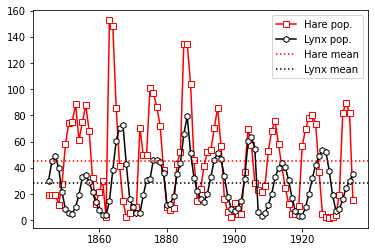

In [111]:
from pandas import read_csv
from numpy  import arange, mean

import numpy as np
import matplotlib.pylab as plt

data = pandas.read_csv("data_examples/harelynx.csv")
data_np = data.to_numpy()

t = data_np[:, 0]
hare = data_np[:, 1]
lynx = data_np[:, 2]


mean_hare = np.mean(hare)
mean_lynx = np.mean(lynx)

plt.plot(t, hare, color='red', marker='s', mfc='white', label="Hare pop.")
plt.plot(t, lynx, color='black', marker='h', mfc='white', label="Lynx pop.")
plt.axhline(mean_hare, color='red', linestyle='dotted', label="Hare mean")
plt.axhline(mean_lynx, color='black', linestyle='dotted', label="Lynx mean")
plt.legend()


plt.savefig('figure_examples/harelynxPop.png', dpi=300, format='png', transparent=True)


#hare = [ e[1] for e in data_np ]
#lynx = [ e[2] for e in data_np ]



## <hr style="border:1px solid black">  Survival guide for practical work <hr style="border:1px solid black">
</br>

Given an example, in this survival guide we will:

1. Plot the data using python. Add axis labels, units, legend.
2. Fit a linear model to the data. 
3. Superimpose this line on the plot and save the figure.
4. Use the linear model equation

### Example

In water-resources engineering, the sizing of reservoirs depends on accurate estimates of
water flow in the river that is being impounded. For some rivers, long-term historical
records of such flow data are difficult to obtain. In contrast, meteorological data on
precipitation are often available for many years past. Therefore, it is often useful to
determine a relationship between flow and precipitation. This relationship can then be
used to estimate flows for years when only precipitation measurements were made. The
following data are available for a river: [<sup>1</sup>](#fn1)

*Dans le domaine de l'ingénierie des ressources en eau, le dimensionnement des réservoirs dépend d'une estimation précise du débit de la rivière que l'on considère. Pour certains cours d'eau, il est difficile d'obtenir des enregistrements historiques à long terme du débit. En revanche, les données météorologiques sur les précipitations sont souvent disponibles pour de plus longues périodes. Par conséquent, il est souvent utile de déterminer une relation entre le débit et les précipitations. Cette relation peut alors être utilisée pour estimer les débits pour les années où seules les précipitations ont été mesurées. Les données suivantes sont disponibles pour une rivière :*

Precip. (cm/yr)|  88.9 | 108.5 | 104.1 | 139.7 | 127.0 | 94.0 | 116.8 | 99.1 |
---------------|-------|-------|-------|-------|-------|------|-------|------|
Flow (m$^3$/s) |  14.6 |  16.7 |  15.3 |  23.2 |  19.5 | 16.1 |  18.1 | 16.6 |



<span id="fn1"> $^1$ Example taken from *Applied Numerical Methods with MATLAB* by S. C. Chapra.</span>

### <hr style="border:1px solid black"> Load the data <hr style="border:1px solid black">

#### Create numpy array with the raw data

> Here we first create list using the data which will be converted to `numpy arrays`

> Warning : we used English floating-point notation !

In [11]:
from numpy import array

prec = [88.9, 108.5, 104.1, 139.7, 127.0, 94.0, 116.8, 99.1]
flow = [14.6,  16.7,  15.3,  23.2,  19.5, 16.1,  18.1, 16.6]

x = array(prec)
y = array(flow)

#### ... or load the data from a file using python intrinsic function

In [12]:
file = open('data_examples/prec_flow.csv','r')
file.readline()

x = [ ] ; y = [ ]
for line in file:
    words = line.split(',')
    x.append( float(words[0]) )
    y.append( float(words[1]) )
print(prec)
print()
print(flow)

[88.9, 108.5, 104.1, 139.7, 127.0, 94.0, 116.8, 99.1]

[14.6, 16.7, 15.3, 23.2, 19.5, 16.1, 18.1, 16.6]


#### ... or load the data from a file using pandas

In [13]:
from pandas import read_csv

data_pandas = read_csv('data_examples/prec_flow.csv')
print(data_pandas)
#data_numpy_array = data_pandas.to_numpy()
#x = data_numpy_array[:,0]
#y = data_numpy_array[:,1]

    prec  flow
0   88.9  14.6
1  108.5  16.7
2  104.1  15.3
3  139.7  23.2
4  127.0  19.5
5   94.0  16.1
6  116.8  18.1
7   99.1  16.6


### <hr style="border:1px solid black"> Plot the graphics <hr style="border:1px solid black">

#### Using Matplotlib

NameError: name 'arange' is not defined

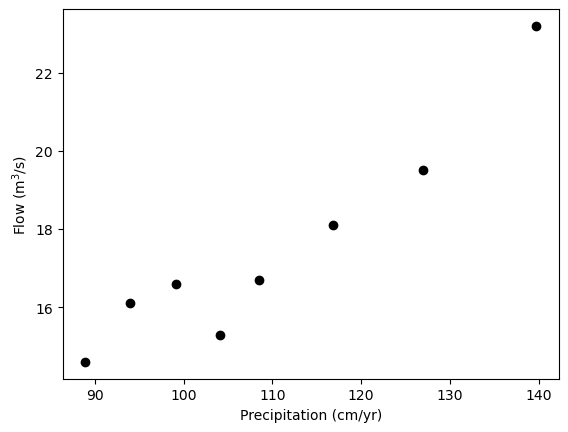

In [14]:
import matplotlib.pylab as plt

plt.plot(x,y,marker='o',color='black', linestyle='')
plt.xlabel("Precipitation (cm/yr)")
plt.ylabel("Flow (m$^3$/s)")

plt.xticks(arange(min(x)+1.1,max(x)+1,5))
plt.yticks(arange(min(y)+0.4,max(y),1))
plt.title('Water flow as a function of precipitation')

#plt.xlim()
#plt.ylim()

#### Using Pandas

> Pandas can be used to performed plot with the function [`DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

<Axes: xlabel='prec', ylabel='flow'>

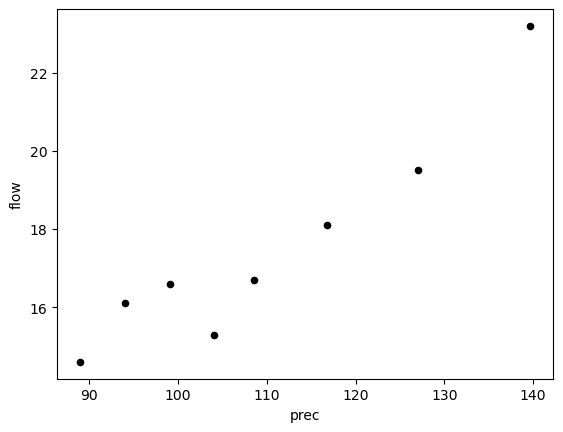

In [15]:
data_pandas.plot(x='prec',y='flow',kind='scatter',color='black')

### <hr style="border:1px solid black"> Perform a linear fit <hr style="border:1px solid black">

> The fit is performed using `curve_fit` from the library `scipy.optimize`

> Given a the data points $\{x_i,y_i\}^N_{i=1}$, the standard error $\{\sigma_i\}^N_{i=1}$ on $\{y_i\}^N_{i=1}$ and the model function $f_\textrm{model}(x;a_0,a_1,...a_m)$ where $\{a_k\}_{k=1}^m$ are the coefficient to optimized. Given $\chi^2$:
$$\chi^2=\sum_{i=1}^{N}\frac{\left[y_i-f_\textrm{model}\left(x_i;a_0,a_1,...a_m\right)\right]^2}{\sigma^2_i}$$
`curve_fit`perform the $\chi^2$ minimization with respect to these coefficients.

First we define the model function ; in this case a linear function: $f(x)=a_0 +a_1x$

In [16]:
def fmodel(x,a0,a1):
    return a0 + a1*x

Then we call the function `curve_fit` 

> with inputs $(f_\textrm{model},x,y,\sigma)$. 

> In output we have the optimal values for the coefficients (`popt`) and the (co)variance (`pcov`) of the coefficient estimates.

In [17]:
from scipy.optimize import curve_fit
from numpy import ones, sqrt

# standard error is set to 1 in this example
sig = ones((len(x)))

# call curve_fit to obtain the optimized coefficients and covariance
popt, pcov = curve_fit(f=fmodel, xdata=x, ydata=y, sigma=sig)

# extract optimized coefficients
[a0, a1] = popt

# extract standard deviation errors
sa0 = sqrt(pcov[0,0])
sa1 = sqrt(pcov[1,1])

print('a0 = %.4f +/- %.4f'%(a0,sa0))
print('a1 = %.4f +/- %.4f'%(a1,sa1))

a0 = 0.8428 +/- 2.3688
a1 = 0.1519 +/- 0.0214


### <hr style="border:1px solid black"> Plot the linear model <hr style="border:1px solid black">

Given $x_\textrm{model}\in[\min(x),\max(x)]$ with $N=128$ compute $y_\textrm{model}=f_\textrm{model}(x_\textrm{model};a_0,a_1)$ 

In [18]:
from numpy import linspace

x_model = linspace(min(x),max(x),128)
y_model = fmodel(x=x_model,a0=a0,a1=a1)

Plot the experimental data and the linear model function ; save the figure

NameError: name 'arange' is not defined

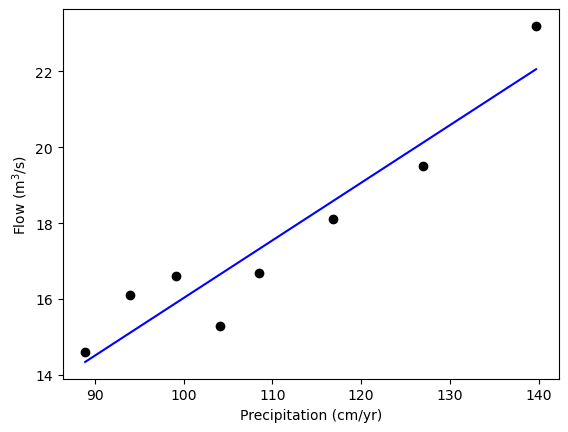

In [19]:
import matplotlib.pylab as plt

plt.plot(x,      y,       marker='o', color='black', linestyle='', label='exp. data')
plt.plot(x_model,y_model, marker= '', color='blue',  linestyle='-',
         label='linear regression with $f(x)= %.3f + %.3f x$'%(a0,a1))

plt.xlabel("Precipitation (cm/yr)")
plt.ylabel("Flow (m$^3$/s)")

plt.xticks(arange(min(x)+1.1,max(x)+1,5))
plt.yticks(arange(min(y)+0.4,max(y),1))

plt.legend()
plt.title('Water flow as a function of precipitation')

plt.savefig('figure_examples/figure_prec_flow.png', dpi=300, format='png', transparent=True)

### <hr style="border:1px solid black"> Use the linear model <hr style="border:1px solid black">

Evaluate the annual water flow if the precipitation is 120 cm/year.

In [20]:
prec = 120
flow = fmodel(x=prec,a0=a0,a1=a1)
print('flow = %.4f m^3/s for prec. = %.4f'%(prec,flow))

flow = 120.0000 m^3/s for prec. = 19.0673
